# Mini Project: Correlation between GDP and Logistics Perfomance Indicator

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv('../Week5 - Data Visualization/Week5-Visualization/world-development-indicators/Indicators.csv')
data.shape

(5656458, 6)

In [5]:
data.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06


In [6]:
countries = data['CountryName'].unique().tolist()

In [7]:
countryCodes = data['CountryCode'].unique().tolist()

In [8]:
years = data['Year'].unique().tolist()

In [9]:
indicators = data['IndicatorName'].unique().tolist()

In [10]:
sorted(indicators)

['2005 PPP conversion factor, GDP (LCU per international $)',
 '2005 PPP conversion factor, private consumption (LCU per international $)',
 'ARI treatment (% of children under 5 taken to a health provider)',
 'Access to electricity (% of population)',
 'Access to electricity, rural (% of rural population)',
 'Access to electricity, urban (% of urban population)',
 'Access to non-solid fuel (% of population)',
 'Access to non-solid fuel, rural (% of rural population)',
 'Access to non-solid fuel, urban (% of urban population)',
 'Adequacy of social insurance programs (% of total welfare of beneficiary households)',
 'Adequacy of social protection and labor programs (% of total welfare of beneficiary households)',
 'Adequacy of social safety net programs (% of total welfare of beneficiary households)',
 'Adequacy of unemployment benefits and ALMP (% of total welfare of beneficiary households)',
 'Adjusted net enrolment rate, primary, both sexes (%)',
 'Adjusted net enrolment rate, prima

In [11]:
hist_indicator = 'Logistics performance index: Overall'

mask_lpi = data['IndicatorName'].str.contains(hist_indicator)
stage1 = data[mask_lpi]

we don't have any null row

In [12]:
print('Years go from',min(stage1['Year']), 'to', max(stage1['Year']))

Years go from 2007 to 2014


Not every year from 2007 to 2014 is present

### We move forward analising 2014 year

In [13]:
mask2014 = data['Year'].isin([2014])

lpi_2014 = stage1[mask2014]
lpi_2014 = lpi_2014.drop(['IndicatorCode'], axis=1)
lpi_2014.shape

(192, 5)

Find 2014 GDP per capita

In [14]:
mask_gdp = data['IndicatorName'].str.contains('GDP per capita \(constant 2005')

gdp_2014 = data[mask_gdp & mask2014]
gdp_2014.shape

(212, 6)

In [15]:
gdp_2014 = gdp_2014.drop(['IndicatorCode'], axis=1)
gdp_2014.shape

(212, 5)

In [16]:
gdp_2014.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year,212.0,2014.000000,0.000000,2014.000000,2014.000000,2014.000000,2014.000000,2014.000000
Value,212.0,10590.113326,15176.993888,152.652871,1129.209758,3995.374758,11696.294495,82960.098918


In [17]:
print(len(lpi_2014))
print(len(gdp_2014))

192
212


### We need to find the common elements between the two DataFrames

In [18]:
common_countries = np.intersect1d(lpi_2014.CountryCode, gdp_2014.CountryCode)
common_countries

array(['AFG', 'ARB', 'ARE', 'ARG', 'ARM', 'AUS', 'AUT', 'AZE', 'BDI',
       'BEL', 'BEN', 'BFA', 'BGD', 'BGR', 'BHR', 'BHS', 'BIH', 'BLR',
       'BOL', 'BRA', 'BTN', 'BWA', 'CAF', 'CAN', 'CEB', 'CHE', 'CHL',
       'CHN', 'CIV', 'CMR', 'COG', 'COL', 'COM', 'CRI', 'CSS', 'CYP',
       'CZE', 'DEU', 'DJI', 'DNK', 'DOM', 'DZA', 'EAP', 'EAS', 'ECA',
       'ECS', 'ECU', 'EGY', 'EMU', 'ESP', 'EST', 'ETH', 'EUU', 'FCS',
       'FIN', 'FJI', 'FRA', 'GAB', 'GBR', 'GEO', 'GHA', 'GIN', 'GNB',
       'GNQ', 'GRC', 'GTM', 'HIC', 'HKG', 'HND', 'HPC', 'HRV', 'HTI',
       'HUN', 'IDN', 'IND', 'IRL', 'IRQ', 'ISL', 'ISR', 'ITA', 'JAM',
       'JOR', 'JPN', 'KAZ', 'KEN', 'KGZ', 'KHM', 'KOR', 'KWT', 'LAC',
       'LAO', 'LBN', 'LBR', 'LBY', 'LCN', 'LDC', 'LIC', 'LKA', 'LMC',
       'LMY', 'LSO', 'LTU', 'LUX', 'LVA', 'MDA', 'MDG', 'MDV', 'MEA',
       'MEX', 'MIC', 'MKD', 'MLI', 'MNA', 'MNE', 'MNG', 'MOZ', 'MRT',
       'MUS', 'MWI', 'MYS', 'NAC', 'NAM', 'NER', 'NGA', 'NIC', 'NLD',
       'NOC', 'NOR',

In [39]:
len(common_countries)

181

In [19]:
lpi_2014_adj = lpi_2014[lpi_2014['CountryCode'].isin(common_countries)]
lpi_2014_adj.shape

(181, 5)

In [20]:
gdp_2014_adj = gdp_2014[gdp_2014['CountryCode'].isin(common_countries)]
gdp_2014_adj.shape

(181, 5)

In [21]:
lpi_2014_adj.head()

,CountryName,CountryCode,IndicatorName,Year,Value
5534443,Arab World,ARB,Logistics performance index: Overall (1=low to...,2014,2.642220
5534691,Caribbean small states,CSS,Logistics performance index: Overall (1=low to...,2014,2.737531
5534996,Central Europe and the Baltics,CEB,Logistics performance index: Overall (1=low to...,2014,3.316988
5535295,East Asia & Pacific (all income levels),EAS,Logistics performance index: Overall (1=low to...,2014,3.183754
5535650,East Asia & Pacific (developing only),EAP,Logistics performance index: Overall (1=low to...,2014,2.853164


### Explore dataframes

In [22]:
gdp_2014_adj.loc[gdp_2014_adj['Value'] == gdp_2014_adj['Value'].max()]

,CountryName,CountryCode,IndicatorName,Year,Value
5597009,Luxembourg,LUX,GDP per capita (constant 2005 US$),2014,82960.098918


In [40]:
lpi_2014_adj.loc[lpi_2014_adj['Value'].idxmin()]

CountryName                                       Congo, Dem. Rep.
CountryCode                                                    ZAR
IndicatorName    Logistics performance index: Overall (1=low to...
Year                                                          2014
Value                                                      1.87886
Name: 5566365, dtype: object

In [24]:
lpi_2014_adj.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year,181.0,2014.000000,0.000000,2014.000000,2014.000000,2014.000000,2014.000000,2014.000000
Value,181.0,2.914552,0.521133,1.878857,2.514919,2.761981,3.260446,4.121983


In [25]:
lpi_2014_adj.loc[lpi_2014_adj['Value'].idxmax()]

CountryName                                                Germany
CountryCode                                                    DEU
IndicatorName    Logistics performance index: Overall (1=low to...
Year                                                          2014
Value                                                      4.12198
Name: 5578746, dtype: object

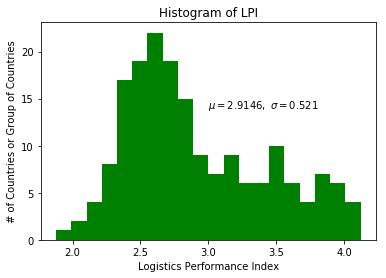

In [36]:
hist_lpi_2014 = lpi_2014_adj['Value'].values

fig_hist_LPI = plt.hist(hist_lpi_2014, 20, density=False, facecolor='green')

plt.title('Histogram of LPI')
plt.xlabel('Logistics Performance Index')
plt.ylabel('# of Countries or Group of Countries')

plt.text(3, 14, r'$\mu=2.9146,\ \sigma=0.521$')

plt.grid(False)

plt.savefig('fig_hist_LPI.png', dpi=100)
plt.show()

In [29]:
gdp_2014_adj.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year,181.0,2014.000000,0.000000,2014.000000,2014.000000,2014.000000,2014.000000,2014.000000
Value,181.0,11168.970029,15846.685999,152.652871,1077.909089,4123.581629,12053.071816,82960.098918


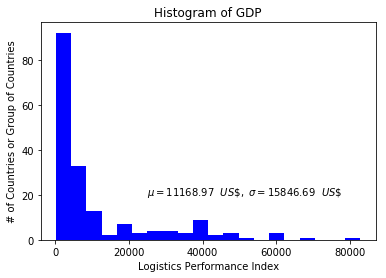

In [43]:
hist_gdp_2014 = gdp_2014_adj['Value'].values

plt.hist(hist_gdp_2014, 20, density=False, facecolor='blue')

plt.title('Histogram of GDP')
plt.xlabel('Logistics Performance Index')
plt.ylabel('# of Countries or Group of Countries')

plt.text(25000, 20, r'$\mu=11168.97 \ \ US\$,\ \sigma=15846.69 \ \ US\$ $')

plt.grid(False)

plt.savefig('fig_hist_GDP.png', dpi = 100)
plt.show()

### Exploring the correlation between LPI and the GDP of a country.

In [31]:
np.corrcoef(gdp_2014_adj['Value'], lpi_2014_adj['Value'])

array([[1.        , 0.81098981],
       [0.81098981, 1.        ]])

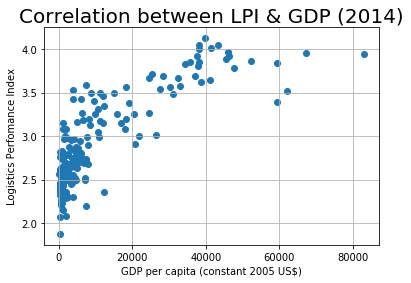

In [49]:
%matplotlib inline

fig, axis = plt.subplots()
# Grid lines, Xticks, Xlabel, Ylabel

axis.grid(True)
axis.set_title('Correlation between LPI & GDP (2014)',fontsize=20)
axis.set_xlabel(gdp_2014_adj['IndicatorName'].iloc[0],fontsize=10)
axis.set_ylabel('Logistics Perfomance Index',fontsize=10)

X = gdp_2014_adj['Value']
Y = lpi_2014_adj['Value']

axis.scatter(X, Y)

plt.savefig('fig_scatter_corr.png', dpi = 100)
plt.show()

We **mighth** guess that the regression curve follows a logarithmic curve of the type Y = A + B*log(X), with A and B equal to:

In [50]:
fit_param = np.polyfit(np.log(X), Y, 1)
fit_param = pd.Series(fit_param, index=['A','B'])

fit_param

A    0.275836
B    0.627199
dtype: float64

## Folium

In [51]:
import folium

In [52]:
country_geo = '../Week5 - Data Visualization/Week5-Visualization/geo/world-countries.json'

In [53]:
lpi_2014.head()

,CountryName,CountryCode,IndicatorName,Year,Value
5534443,Arab World,ARB,Logistics performance index: Overall (1=low to...,2014,2.642220
5534691,Caribbean small states,CSS,Logistics performance index: Overall (1=low to...,2014,2.737531
5534996,Central Europe and the Baltics,CEB,Logistics performance index: Overall (1=low to...,2014,3.316988
5535295,East Asia & Pacific (all income levels),EAS,Logistics performance index: Overall (1=low to...,2014,3.183754
5535650,East Asia & Pacific (developing only),EAP,Logistics performance index: Overall (1=low to...,2014,2.853164


In [54]:
viz_data = lpi_2014[['CountryCode','Value']]
viz_data.head()

,CountryCode,Value
5534443,ARB,2.642220
5534691,CSS,2.737531
5534996,CEB,3.316988
5535295,EAS,3.183754
5535650,EAP,2.853164


In [55]:
m = folium.Map(location=[10, 10], zoom_start=1.3)

In [56]:
folium.Choropleth(geo_data=country_geo, data=viz_data,
             columns=['CountryCode', 'Value'],
             key_on='feature.id',
             fill_color='YlGn', fill_opacity=0.7, line_opacity=0.2,
             legend_name = lpi_2014.iloc[0]['IndicatorName']).add_to(m)

In [57]:
folium.LayerControl().add_to(m)

In [58]:
m

In [62]:
m.save('output.html')